In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly

In [61]:
# returns = pd.read_csv("../data/weekly_returns.csv")
returns = pd.read_csv("../data/weekly_prices.csv")

returns.Date = pd.DatetimeIndex(returns.Date)

returns.head()

,Date,ABEV3.SA,BBAS3.SA,BBDC4.SA,CPLE6.SA,CSAN3.SA,CSNA3.SA,ELET3.SA,ENBR3.SA,GGBR4.SA,ITUB4.SA,JBSS3.SA,PETR4.SA,SANB11.SA,SULA11.SA,TIMS3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
0,2009-12-28,3.951598,12.793223,7.752972,1.662125,3.810204,15.318744,16.797285,5.202840,20.250761,10.749114,7.336628,15.525704,11.208709,7.715206,5.193824,19.833513,25.171341,13.287959,2.098787
1,2010-01-04,4.107028,13.177683,7.897883,1.716423,3.607500,15.940038,17.732258,5.507967,20.655499,10.840784,7.699982,15.635729,10.997664,7.638053,5.339106,20.691870,27.274872,12.931190,2.216593
2,2010-01-11,4.188169,12.925796,7.692004,1.691742,3.570922,16.020473,16.576212,5.773977,20.173027,10.354597,7.831406,15.127936,10.739727,7.409624,5.266466,20.468063,27.092400,12.770422,2.151399
3,2010-01-18,4.188694,12.612032,6.775274,1.673792,3.490146,14.866642,19.344286,5.640972,18.215162,10.071210,7.406207,14.704775,10.176943,7.706129,5.230145,18.921770,25.602179,12.685757,2.058754
4,2010-01-25,3.951598,12.417598,6.679334,1.729436,3.246293,15.254953,18.441551,5.531439,17.718704,10.037878,7.220667,14.459344,10.561512,7.412646,5.084863,20.183226,24.791185,13.017365,2.064474


In [62]:
asset = returns[["Date","PETR4.SA"]]

asset

,Date,PETR4.SA
0,2009-12-28,15.525704
1,2010-01-04,15.635729
2,2010-01-11,15.127936
3,2010-01-18,14.704775
4,2010-01-25,14.459344
...,...,...
622,2021-11-29,17.100182
623,2021-12-06,19.804123
624,2021-12-13,19.363289
625,2021-12-20,18.922455


In [63]:
asset = asset.rename(columns={"PETR4.SA":'y',
                              'Date':'ds'})

asset

,ds,y
0,2009-12-28,15.525704
1,2010-01-04,15.635729
2,2010-01-11,15.127936
3,2010-01-18,14.704775
4,2010-01-25,14.459344
...,...,...
622,2021-11-29,17.100182
623,2021-12-06,19.804123
624,2021-12-13,19.363289
625,2021-12-20,18.922455


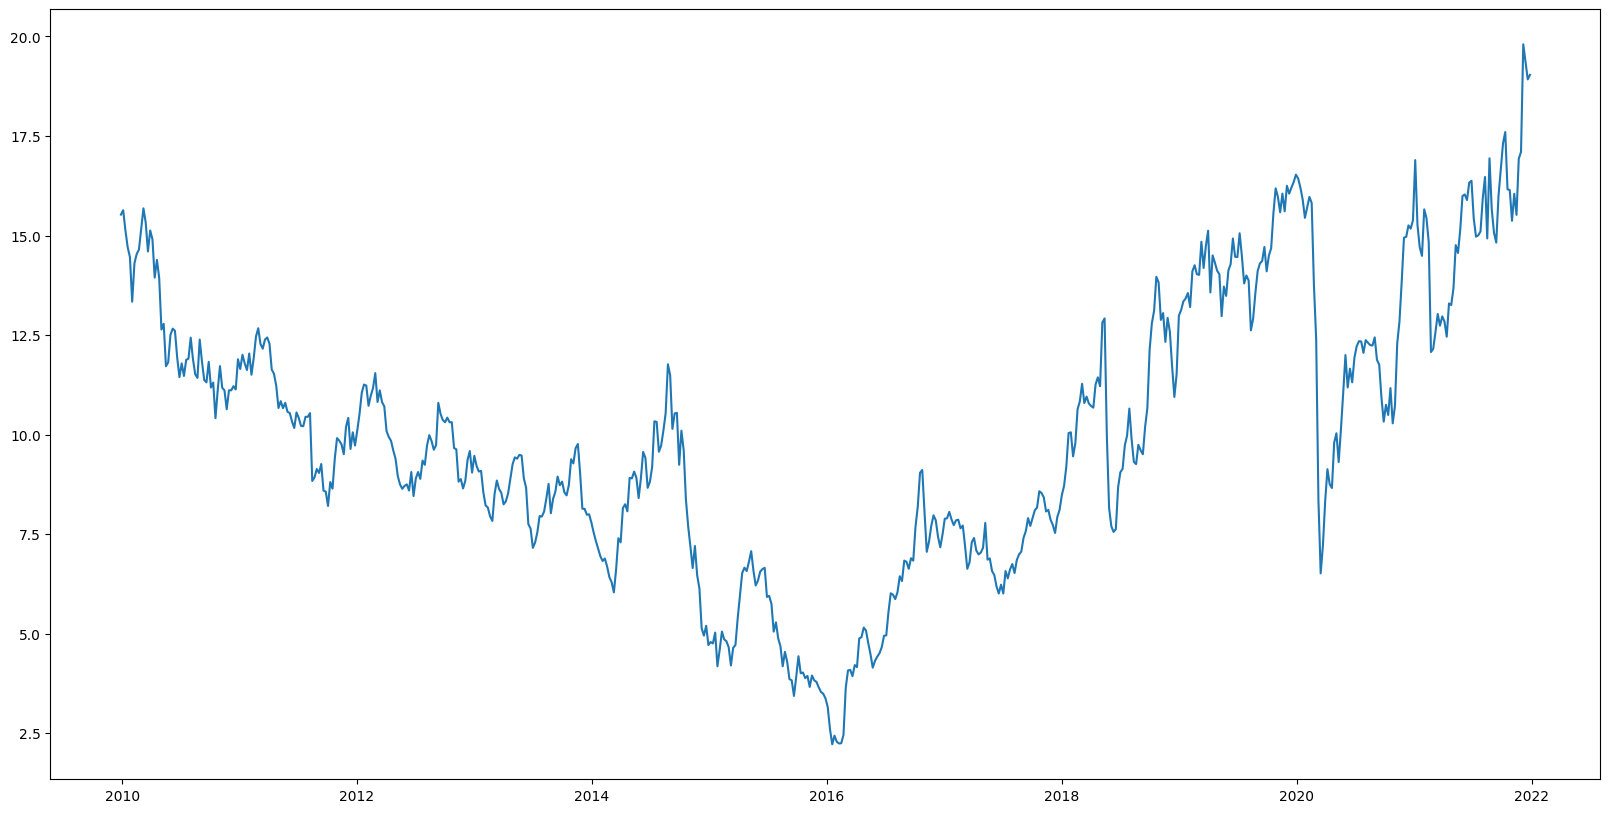

In [65]:
plt.figure(figsize=(20,10))
plt.plot(asset.ds,asset.y)
plt.show()

In [66]:
last_train_year = 2020 
test_year = 2021

train = asset[asset.ds.dt.year <= 2020]
test = asset[asset.ds.dt.year == 2021]

print(train.shape,test.shape)

(575, 2) (52, 2)


In [74]:
model = Prophet(
                n_changepoints = 10,
                weekly_seasonality=True,
                daily_seasonality=True)
model.add_country_holidays(country_name="Brazil")

model.fit(train)

17:23:51 - cmdstanpy - INFO - Chain [1] start processing
17:23:51 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
future = model.make_future_dataframe(periods=52,freq='w')
forecast = model.predict(future)


future["yhat"] = forecast.yhat
future

,ds,yhat
0,2009-12-28,13.506731
1,2010-01-04,13.635368
2,2010-01-11,13.611141
3,2010-01-18,13.428701
4,2010-01-25,13.217466
...,...,...
622,2021-11-28,15.953062
623,2021-12-05,15.885887
624,2021-12-12,15.854014
625,2021-12-19,15.933155


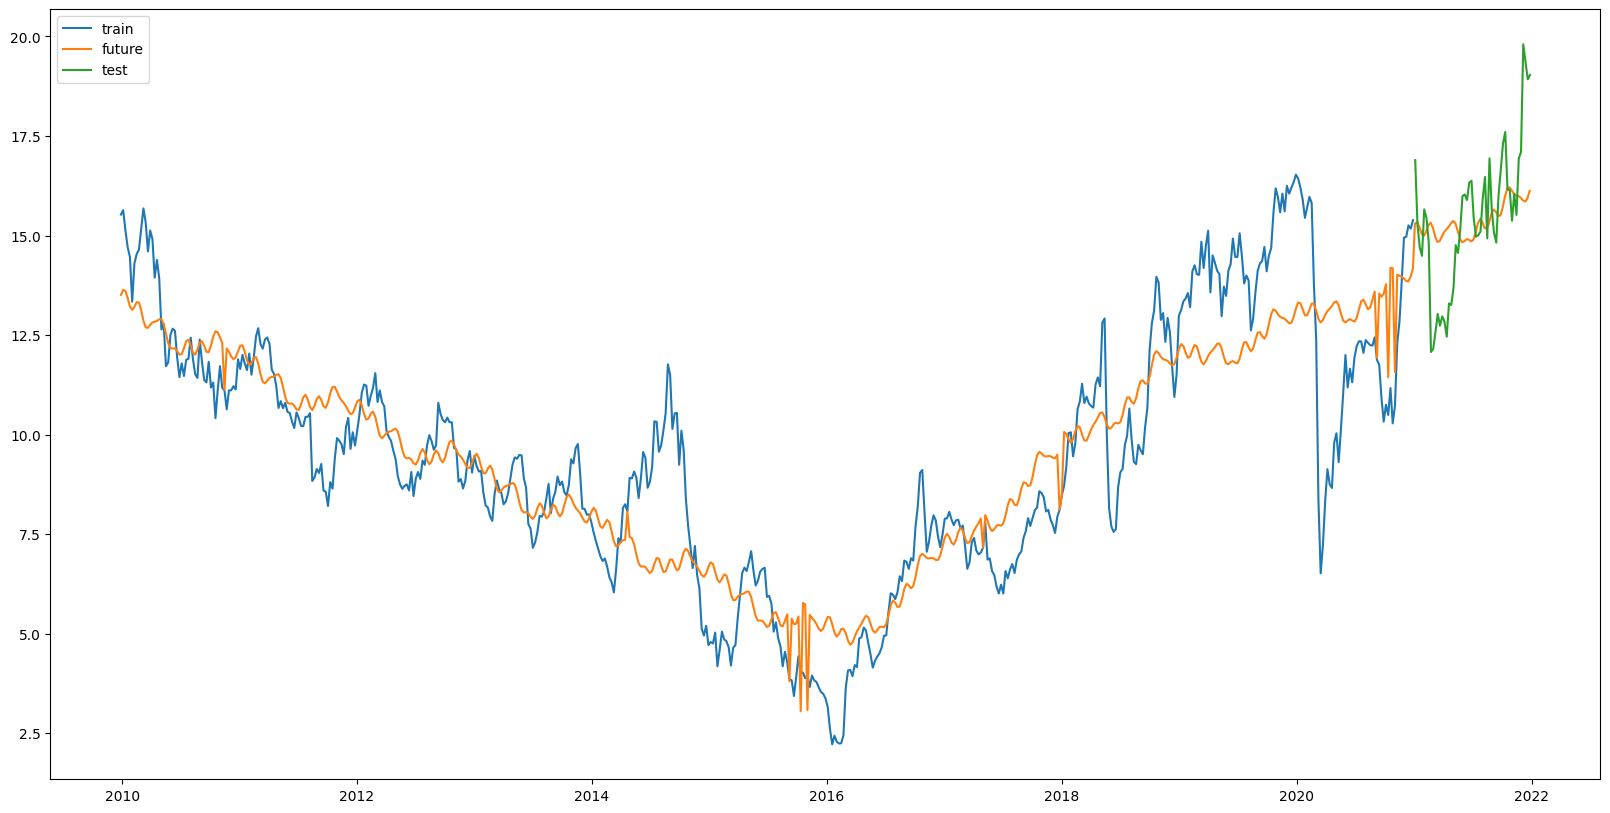

In [76]:
plt.figure(figsize=(20,10))
plt.plot(train.ds,train.y,label="train")
plt.plot(future.ds,future.yhat,label="future")
plt.plot(test.ds,test.y,label="test")
plt.legend()
plt.show()

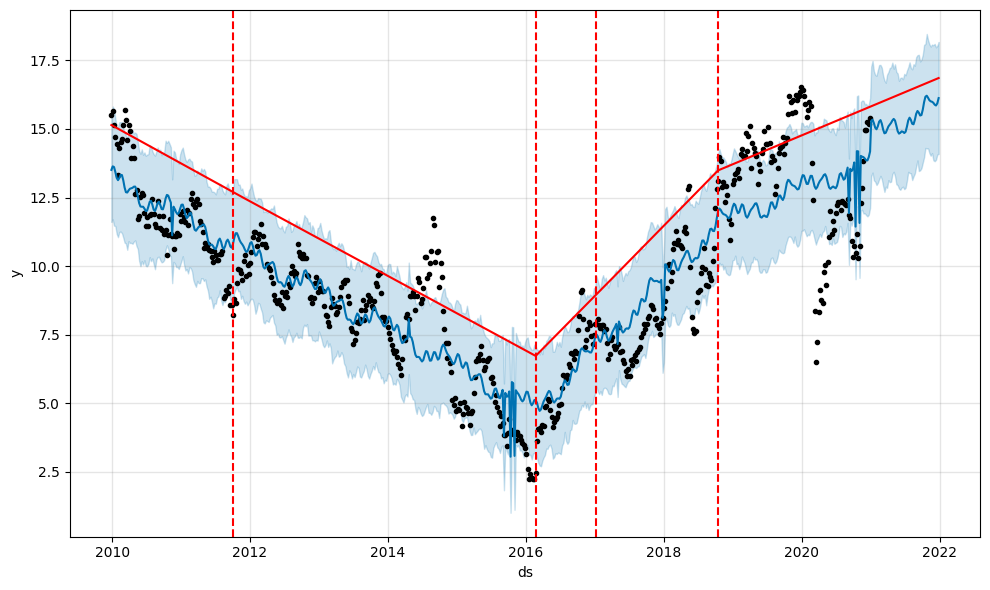

In [77]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)